In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import urllib.request
import os

In [90]:
from pathlib import Path

data_path = Path().cwd().parent / "datasets" / "life_sat"
data_path.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (data_path / filename).exists():
        print("Downloading ", filename)
        url = data_root + "life_sat/" + filename
        urllib.request.urlretrieve(url, data_path / filename)

In [91]:
oecd_bli = pd.read_csv(data_path / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(data_path / "gdp_per_capita.csv")

In [92]:
gdp_pc_col = "GDP per capita (USD)"
life_sat = "Life satisfaction"
gdp_per_capita.columns = ["Country", "Code", "Year", gdp_pc_col]
gdp_per_capita.head()

,Country,Code,Year,GDP per capita (USD)
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [93]:
gdp_per_capita.dtypes

Country                  object
Code                     object
Year                      int64
GDP per capita (USD)    float64
dtype: object

In [94]:
# 只要2020年的数据
gdp_per_capita_2020 = gdp_per_capita[["Country", gdp_pc_col]][gdp_per_capita["Year"] == 2020]
gdp_per_capita_2020.set_index("Country", inplace=True)
gdp_per_capita_2020.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [95]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [96]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
# 将国家和指标做成透视表
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [97]:
oecd_bli.index.names

FrozenList(['Country'])

In [98]:
# 合并GDP和生活满意度数据
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita_2020, left_index=True, right_index=True)
full_country_stats.sort_values(by=gdp_pc_col, inplace=True)
full_country_stats = full_country_stats[[gdp_pc_col, life_sat]]
full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [99]:
full_country_stats["GDP per capita (USD)"].max()

110261.157353302

In [100]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdp_pc_col] >= min_gdp) &
                                   (full_country_stats[gdp_pc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [101]:
country_stats.to_csv(data_path / "life_sat.csv")
full_country_stats.to_csv(data_path / "life_sat_full.csv")

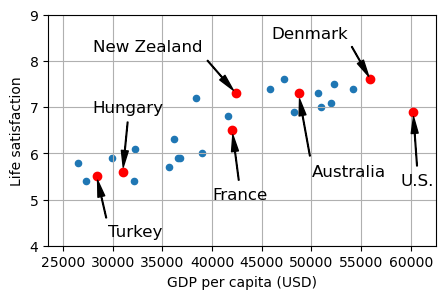

In [103]:
country_stats.plot(kind="scatter", figsize=(5, 3), grid=True, x=gdp_pc_col, y=life_sat)
min_life_sat = 4
max_life_sat = 9
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdp_pc_col].loc[country]
    pos_data_y = country_stats[life_sat].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country,
                 xy=(pos_data_x, pos_data_y),
                 xytext=pos_text,
                 fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.savefig(data_path / "life_sat.png")
plt.show()

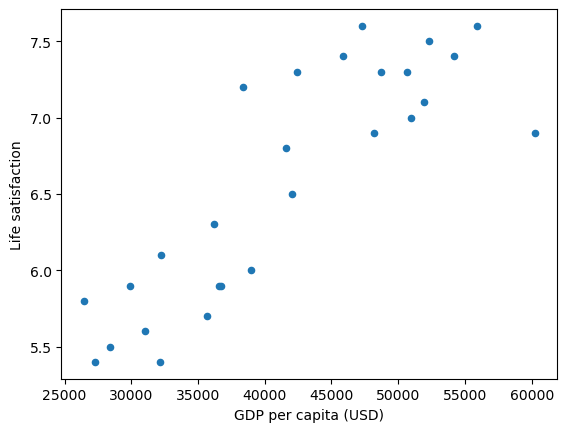

[[5.2999261]]


In [110]:
# 使用Scikit-Learn训练并运行一个线性模型
X = np.c_[country_stats[gdp_pc_col]]
y = np.c_[country_stats[life_sat]]
country_stats.plot(kind="scatter", x = gdp_pc_col, y = life_sat)
plt.show()

model = linear_model.LinearRegression()
model.fit(X, y)

x_new = [[22878]]
print(model.predict(x_new))